In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/USER/Downloads/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
X = df.drop('sales', axis=1)
y = df['sales']

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

In [9]:
poly_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [10]:
poly_features = poly_converter.transform(X)

In [11]:
X.shape

(200, 3)

In [12]:
poly_features.shape

(200, 9)

In [13]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [14]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [19]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  0.590597483380802
MSE:  0.5231944949055376
RMSE:  0.7233218473857523


In [20]:
model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [21]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [22]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    train_rmse = np.sqrt(train_mse)
    test_mse = mean_squared_error(y_test, test_pred)
    test_rmse = np.sqrt(test_mse)

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [23]:
train_rmse_errors

[1.574596830590544,
 0.5950712355838924,
 0.4688758111822088,
 0.3694689701771468,
 0.243822065795955,
 0.195661752958604,
 0.518474932516713,
 0.18044580738224741,
 0.16791610517001054]

In [24]:
test_rmse_errors

[1.9485372043446394,
 0.7233218473857523,
 0.539235098560283,
 1.3032266036123044,
 5.946745158446908,
 25.393475032062888,
 614.2273943308974,
 3181.556548093863,
 139969.43114152312]

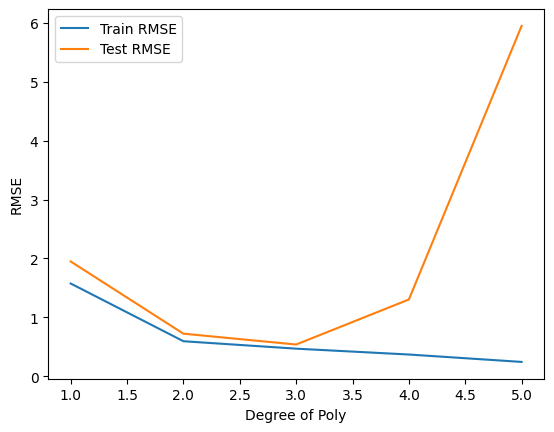

In [28]:
plt.plot(range(1, 6), train_rmse_errors[:5], label="Train RMSE")
plt.plot(range(1, 6), test_rmse_errors[:5], label="Test RMSE")

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()